In [2]:
  import pandas as pd
  import numpy as np 
  import matplotlib as mlt
  import matplotlib.pyplot as plt
  import seaborn as sns

  print('libraries imported!!')



libraries imported!!


In [12]:
df= pd.read_csv("../Downloads/Data_Collision.csv")


In [13]:
df.shape

(194673, 38)

In [14]:
df['month'] = pd.DatetimeIndex(df['INCDATE']).month
df['year'] = pd.DatetimeIndex(df['INCDATE']).year
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,month,year
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,3,2013
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,12,2006
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,11,2004
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,NaN,NaN,23,From same direction - all others,0,0,N,3,2013
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,1,2004


In [15]:
df1 = df[df['SEVERITYCODE']==1]
df2 = df[df['SEVERITYCODE']==2]

In [18]:
## create pie chart for collision type 

tab1 = df1['COLLISIONTYPE'].value_counts().reset_index()
tab1.columns = ['collision_type','counts']
tab1

,collision_type,counts
0,Parked Car,45325
1,Angles,21050
2,Rear Ended,19419
3,Other,17591
4,Sideswipe,16103
5,Left Turn,8292
6,Right Turn,2347
7,Head On,1152
8,Pedestrian,672
9,Cycles,671


In [19]:
tab2 = df2['COLLISIONTYPE'].value_counts().reset_index()
tab2.columns = ['collision_type','counts']
tab2

,collision_type,counts
0,Rear Ended,14671
1,Angles,13624
2,Other,6112
3,Pedestrian,5936
4,Left Turn,5411
5,Cycles,4744
6,Parked Car,2662
7,Sideswipe,2506
8,Head On,872
9,Right Turn,609


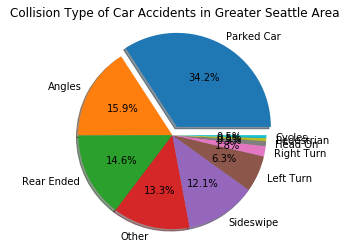

In [20]:
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(tab1['counts'], labels = tab1['collision_type'],explode = explode, autopct ='%1.1f%%', shadow =True,startangle=0)
plt.title("Collision Type of Car Accidents in Greater Seattle Area")
plt.axis('equal')
plt.show()

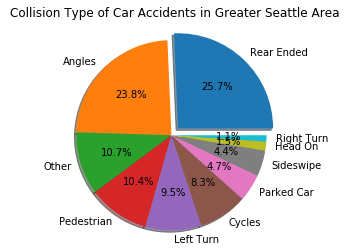

In [21]:
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(tab2['counts'], labels = tab2['collision_type'],explode = explode, autopct ='%1.1f%%', shadow =True,startangle=0)
plt.title("Collision Type of Car Accidents in Greater Seattle Area")
plt.axis('equal')
plt.show()

In [22]:
df['INCDATE']

0         2013/03/27 00:00:00+00
1         2006/12/20 00:00:00+00
2         2004/11/18 00:00:00+00
3         2013/03/29 00:00:00+00
4         2004/01/28 00:00:00+00
                   ...          
194668    2018/11/12 00:00:00+00
194669    2018/12/18 00:00:00+00
194670    2019/01/19 00:00:00+00
194671    2019/01/15 00:00:00+00
194672    2018/11/30 00:00:00+00
Name: INCDATE, Length: 194673, dtype: object

In [23]:
year_tab = df['year'].value_counts().reset_index()
year_tab.columns = ['year','counts']
year_tab.sort_values(by = 'year',inplace=True)
year_tab


,year,counts
5,2004,11865
1,2005,15115
0,2006,15188
2,2007,14456
3,2008,13660
7,2009,11734
12,2010,10808
9,2011,10919
10,2012,10907
13,2013,10577


In [24]:
## subset data according to severity code of car accidents and get their frequency of accidents happened each year
year_tab1 = df1['year'].value_counts().reset_index()
year_tab1.columns = ['year','counts']
year_tab1.sort_values(by = 'year',inplace=True)

year_tab2 = df2['year'].value_counts().reset_index()
year_tab2.columns = ['year','counts']
year_tab2.sort_values(by = 'year',inplace=True)




In [25]:
year_tab1.head()

,year,counts
7,2004,8218
1,2005,10665
0,2006,10838
2,2007,10439
3,2008,9893


In [26]:
year_tab2.head()

,year,counts
6,2004,3647
0,2005,4450
1,2006,4350
2,2007,4017
3,2008,3767


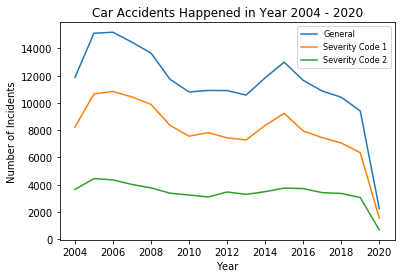

In [27]:
## line graph to visualize the general trends of car accidents happened each year

plt.plot(year_tab['year'], year_tab['counts'],label = "General")
plt.plot(year_tab1['year'], year_tab1['counts'],label = 'Severity Code 1')
plt.plot(year_tab2['year'], year_tab2['counts'],label = 'Severity Code 2')
plt.legend(fontsize =8)
plt.title('Car Accidents Happened in Year 2004 - 2020')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

In [28]:
month_tab = df['month'].value_counts().reset_index()
month_tab.columns = ['month','counts']
month_tab.sort_values(by = 'month',inplace=True)
month_tab

,month,counts
4,1,16407
11,2,14390
7,3,16150
8,4,15978
1,5,16763
3,6,16566
5,7,16364
6,8,16296
9,9,15864
0,10,17768


In [29]:
month_tab1 = df1['month'].value_counts().reset_index()
month_tab1.columns = ['month','counts']
month_tab1.sort_values(by = 'month',inplace=True)
month_tab1

,month,counts
1,1,11704
11,2,10293
5,3,11415
7,4,11216
4,5,11567
3,6,11638
6,7,11227
8,8,11214
10,9,11053
0,10,12273


In [30]:
month_tab2 = df2['month'].value_counts().reset_index()
month_tab2.columns = ['month','counts']
month_tab2.sort_values(by = 'month',inplace=True)
month_tab2

,month,counts
9,1,4703
11,2,4097
8,3,4735
7,4,4762
1,5,5196
4,6,4928
2,7,5137
3,8,5082
6,9,4811
0,10,5495


In [31]:

data = {'Month':month_tab['month'], 'Severity_1':month_tab1['counts'], 'Severity_2':month_tab2['counts'], 'Overall':month_tab['counts']} 

month_overall = pd.DataFrame(data) 
month_overall.sort_values(by='Month',inplace=True)

month_overall.head()



,Month,Severity_1,Severity_2,Overall
4,1,11567,4928,16407
11,2,10293,4097,14390
7,3,11216,4762,16150
8,4,11214,4735,15978
1,5,11704,5196,16763


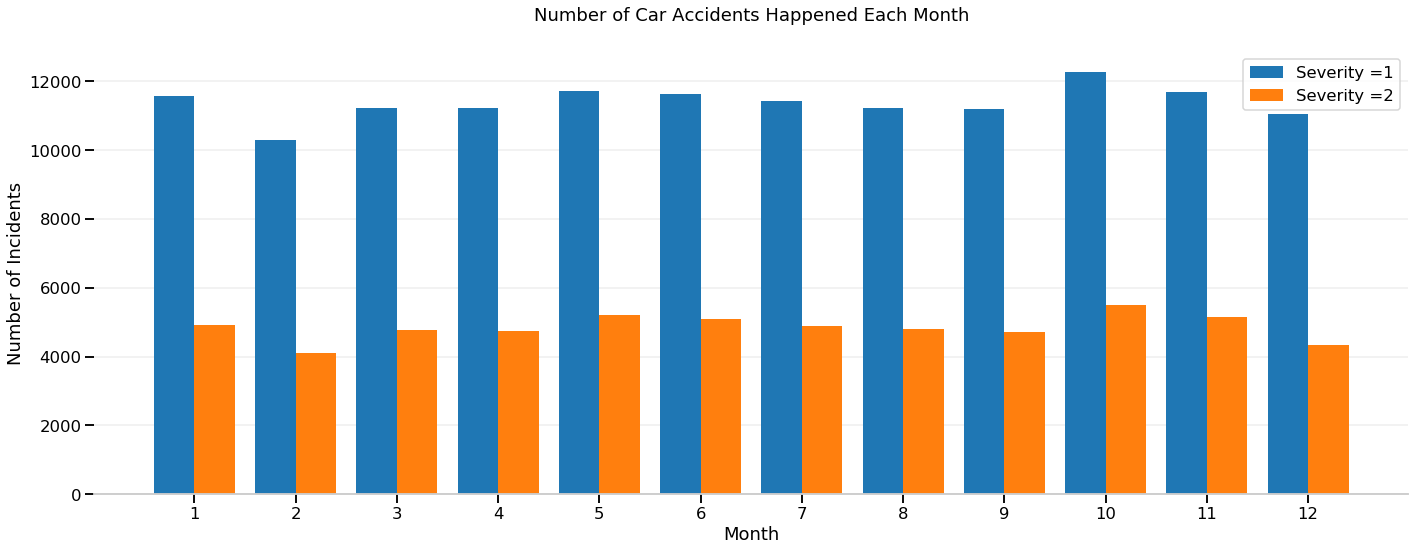

In [236]:
sns.set_context('talk')
x = np.arange(len(month_overall.Month.unique()))
width = 0.4
fig, ax = plt.subplots(figsize=(20,8))

b1 = ax.bar(x, month_overall['Severity_1'],width=width,label = 'Severity =1')
b2 = ax.bar(x+width, month_overall['Severity_2'],width=width,label = 'Severity =2')

ax.set_xticks(x + width / 2)
ax.set_xticklabels(month_overall.Month.unique())
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Number of Incidents')
ax.set_title('Number of Car Accidents Happened Each Month',pad=30)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#CCCCCC')

fig.tight_layout()

In [32]:

## Modeling 

## remove unnecessary features 
df_new = df[['ADDRTYPE','STATUS','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','VEHCOUNT','JUNCTIONTYPE', 'WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR','year','month','SEVERITYCODE']]
df_new.dropna()




,ADDRTYPE,STATUS,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,year,month,SEVERITYCODE
0,Intersection,Matched,Angles,2,0,2,At Intersection (intersection related),Overcast,Wet,Daylight,N,2013,3,2
1,Block,Matched,Sideswipe,2,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N,2006,12,1
2,Block,Matched,Parked Car,4,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,N,2004,11,1
3,Block,Matched,Other,3,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,2013,3,1
4,Intersection,Matched,Angles,2,0,2,At Intersection (intersection related),Raining,Wet,Daylight,N,2004,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,Block,Matched,Head On,3,0,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,2018,11,2
194669,Block,Matched,Rear Ended,2,0,2,Mid-Block (not related to intersection),Raining,Wet,Daylight,N,2018,12,1
194670,Intersection,Matched,Left Turn,3,0,2,At Intersection (intersection related),Clear,Dry,Daylight,N,2019,1,2
194671,Intersection,Matched,Cycles,2,0,1,At Intersection (intersection related),Clear,Dry,Dusk,N,2019,1,2


In [61]:
print(df_new.dtypes)

ADDRTYPE         object
STATUS            int64
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
VEHCOUNT          int64
JUNCTIONTYPE     object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
HITPARKEDCAR     object
year              int64
month             int64
SEVERITYCODE      int64
dtype: object


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_new['ADDRTYPE'] = df_new['ADDRTYPE'].astype(str)
df_new['COLLISIONTYPE'] = df_new['COLLISIONTYPE'].astype(str)
df_new['WEATHER'] = df_new['WEATHER'].astype(str)
df_new['ROADCOND'] = df_new['ROADCOND'].astype(str)
df_new['LIGHTCOND'] = df_new['LIGHTCOND'].astype(str)
df_new['JUNCTIONTYPE'] = df_new['JUNCTIONTYPE'].astype(str)
df_new['HITPARKEDCAR'] = df_new['HITPARKEDCAR'].astype(str)


df_new['ADDRTYPE'] = le.fit_transform(df_new['ADDRTYPE'])
df_new['STATUS'] = le.fit_transform(df_new['STATUS'])
df_new['COLLISIONTYPE'] = le.fit_transform(df_new['COLLISIONTYPE'])
df_new['WEATHER'] = le.fit_transform(df_new['WEATHER'])
df_new['ROADCOND'] = le.fit_transform(df_new['ROADCOND'])
df_new['LIGHTCOND'] = le.fit_transform(df_new['LIGHTCOND'])

df_new['JUNCTIONTYPE'] = le.fit_transform(df_new['JUNCTIONTYPE'])
df_new['HITPARKEDCAR'] = le.fit_transform(df_new['HITPARKEDCAR'])
df_new['month'] = le.fit_transform(df_new['month'])





In [81]:
X = df_new.iloc[:,1:13]
y=df_new['SEVERITYCODE']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [83]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7281257491181808


In [88]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

year             0.226905
month            0.194272
COLLISIONTYPE    0.167802
PERSONCOUNT      0.086355
JUNCTIONTYPE     0.073184
LIGHTCOND        0.072140
VEHCOUNT         0.056856
PEDCOUNT         0.048638
WEATHER          0.045350
ROADCOND         0.022083
HITPARKEDCAR     0.004743
STATUS           0.001673
dtype: float64

No handles with labels found to put in legend.


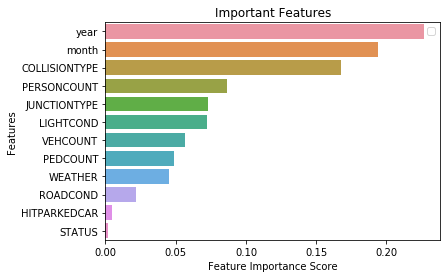

In [90]:
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.legend()
plt.show()